# Object-oriented programming

- Syntax of OOP
- Build a python package to analyze distributions. 

Outline 

- Object-oriented programming syntax
 - procedural vs object-oriented programming
 - classes, objects, methods and attributes
 - magic methods
 - inheritance

- Using OOP to make a Python package
 - making a package
 - tour of scikit-learn source code
 - putting your package on PyPi
 
> Objects are defined by **characteristics** and **actions**!

Example Salesperson:

- Characteristics: Name, Address, Phone Number
- Actions: Sell item, take items, clean, etc. 

## Class, object, method, attribute

- class - a blueprint consisting of methods and attributes
- object - an instance of a class. It can help to think of objects as something in the real world like a yellow pencil, a small dog, a blue shirt, etc. However, as you'll see later in the lesson, objects can be more abstract.
- attribute - a descriptor or characteristic. Examples would be color, length, size, etc. These attributes can take on specific values like blue, 3 inches, large, etc.
- method - an action that a class or object could take
- OOP - a commonly used abbreviation for object-oriented programming
- encapsulation - one of the fundamental ideas behind object-oriented programming is called encapsulation: you can combine functions and data all into a single entity. In object-oriented programming, this single entity is called a class. Encapsulation allows you to hide implementation details much like how the scikit-learn package hides the implementation of machine learning algorithms.

## OOP Syntax

In [1]:
# Define a class
class Shirt: 
    def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
        self.color = shirt_color
        self.size = shirt_size
        self.style = shirt_style
        self.price = shirt_price
        
    def change_price(self, new_price):
        self.price = new_price
        
    def discount(self, discount):
        return self.price * (1-discount)    

In [2]:
# Instantiate an object of the clas
Shirt("red", "S", "short sleeve", 15)

- location and memory where the object is stored

In [3]:
# instantiate and save object
new_shirt = Shirt("red", "S", "short sleeve", 10)

# access attributes
print(new_shirt.color)
print(new_shirt.size)
print(new_shirt.style)
print(new_shirt.price)

# use method: discount
print(new_shirt.discount(.2))

red
S
short sleeve
10
8.0


In [4]:
# build a tshirt collection
tshirt_collection = []
shirt_one = Shirt("orange", "M", "short-sleeve", 25)
shirt_two = Shirt("red", "S", "short-sleeve", 15)
shirt_three = Shirt("purple", "XL", "short-sleeve", 10)

tshirt_collection.append(shirt_one)
tshirt_collection.append(shirt_two)
tshirt_collection.append(shirt_three)

for i in range(len(tshirt_collection)):
    print(tshirt_collection[i].color)
    
# alternatively
for shirt in tshirt_collection:
    print(shirt.size)

orange
red
purple
M
S
XL


#### What is the difference between function and method?

A function and a method look very similar and both use the `def` keyword. 

- The difference is that a method is inside of a class whereas a function is outside of a class. 

#### What is self?

If you instantiate two objects, how does Python differentiate between these two objects?

```python
shirt_one = Shirt("red", "S", "short-sleeve", 15)
shirt_two = Shirt("yellow", "M", "long-sleeve" 20)
```

If you call the `change_price` method on shirt_one, how does Python know to change tghe price of shirt_one and not shirt_two?

```python
shirt_one.change_price(12)
```

Python is calling the `change_price` method: 

```python
def change_price(self, new_price):
    self.price = new_price
```

`self` tells Python where to look in the computer's memory for the shirt_one object. Then, Python changes the price of the shirt_one object. When you call the `change_price` method, `shirt_one.change_price(12), self` is implicitly passed in. 

The word `self` is just a convention. Any other name could be used as well as long as you are consistent. However, when working with other people you should always use `self` rather than some other word or else you might confuse people. So why not use it in the first place...

## Quiz: OOP Syntax Practice - Part 1

In [5]:
class Shirt:

    def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
        self.color = shirt_color
        self.size = shirt_size
        self.style = shirt_style
        self.price = shirt_price
    
    def change_price(self, new_price):
    
        self.price = new_price
        
    def discount(self, discount):

        return self.price * (1 - discount)
    
shirt_one = Shirt("red", "S", "long-sleeve", 25)
print(shirt_one.price)
shirt_one.change_price(10)
print(shirt_one.price)
shirt_one.discount(.12)

shirt_two = Shirt("orange", "L", "short-sleeve", 10)
total = shirt_one.price + shirt_two.price
total_discount = shirt_one.discount(.14) + shirt_two.discount(.06)
print(total_discount)

25
10
18.0


## A Couple of Notes about OOP

#### General Workflow

- Use modularized code
 - write class in one file and import class in another file
 - I.e. define class in "shirt.py"
 - Use `from shirt import Shirt` in another file
 - Then, run the code in the terminal
 
#### Set and Get methods 

Accessing attributes in Python can be somewaht different than in other programming langauges. 

The shirt class has a method to change the price of the shirt: `shirt_one.change_price(20)`. In Python, you can also access and change the values of an attribute in the following way: 

```python
shirt_one.price = 10
shirt_one.price = 20
shirt_one.color = "red"

shirt_one.size = "M"
shirt_one.style = "long-sleeve"
```

To access price, color and other attributes in this way would not be possible in other programming languages and there are reasons for this. 

In general, the convention of OOP is to use methods to access attributes or change attribute values. These methods are called **set** and **get** methods or setter and getter methods. 

- **Get method**: For obtaining an attribute value
- **Set method**: Changing an attribute value. 

Example: 

```python
class Shirt:
    def __init__(self, shirt_color, shirt_size, shirt_style, shirt_price):
        
    def get_price(self):
        return self._price
    
    def set_price(self, new_price):
        self._price = new_price
```
Instantiating and using an object might look like this: 

```python
shirt_one = Shirt("yellow", "M", "long-sleeve", 15)
print(shirt_one.get_price())
shirt_one.set_price(10)
```

What about the underscore?

- Controversial convention in Python
- Comparable to a private variable in other languages
 - private variables in other languages prohibit an object from accessing the price attribute directly like `shirt_one._price = 15`
 - Python does not distinguish between private and public variables

> Convention: Underscore in front of price is to let a programmer know that price should only be accessed with get and set methods and not directly with `shirt_one._price`

- Note that in theory the programmer still could access price using `_price` but this is not following the intent of how the shirt class was designed.
- Benefits set and get methods: Hide implementation from user. Maybe original variable was coded as list and became a dictionary. 
 - Using get and set methods could easily change how that variable gets accessed. 
 - Without set and get methods: Have to go to every place in the code that accessed the variable directly and change the code.  
 
Additional resource: [Python Tutorial site](https://www.python-course.eu/python3_properties.php)

#### A Note about Attributes

Drawbacks to accessing attributes directly versus method for accessing attributes:

- Python does not have the option to distinguish between private and public variables. 

Why might it be better to change a value with a method instead of directly? 

- Changing values via methods gives more flexibility in the long-term. 
 - I.e. if units of measurement change (changing currencies for example)
 
Example: 

```python
shirt_one.price = 10 # USD

# change to Euros 
shirt_one.price = 8 # ~EUR
```

If a method had been used, the you'd only have to change the method to convert form dollars to Euros.

```python
def change_price(self, new_price):
    self.price = new_price * 0.81 # convert USD to EUR
    
shirt_one.change_price(10)
```

## Exercise: OOP Syntax Practice - Part 2

- Write a `Pants` class similar to the `Shirt` class
 - Practice instantiating Pants objects
- Write a `SalesPerson` class
 - Practice instantiating objects for this class
 
#### Pants class

Characteristics: 

* the class name should be Pants
* the class attributes should include
 * color
 * waist_size
 * length
 * price
* the class should have an init function that initializes all of the attributes
* the class should have two methods
 * change_price() a method to change the price attribute
 * discount() to calculate a discount

In [6]:
### TODO:
#   - code a Pants class with the following attributes
#   - color (string) eg 'red', 'yellow', 'orange'
#   - waist_size (integer) eg 8, 9, 10, 32, 33, 34
#   - length (integer) eg 27, 28, 29, 30, 31
#   - price (float) eg 9.28

### TODO: Declare the Pants Class 
class Pants:

### TODO: write an __init__ function to initialize the attributes
    def __init__(self, pants_color, pants_waist_size, pants_length, pants_price):
        self.color = pants_color
        self.waist_size = pants_waist_size
        self.length = pants_length
        self.price = pants_price 

### TODO: write a change_price method:
#    Args:
#        new_price (float): the new price of the shirt
#    Returns:
#        None
    def change_price(self, new_price):
        self.price = new_price

### TODO: write a discount method:
#    Args:
#        discount (float): a decimal value for the discount. 
#            For example 0.05 for a 5% discount.
#
#    Returns:
#        float: the discounted price
    def discount(self, discount):
        return self.price * (1-discount)
    
    
### Check results ###
def check_results():
    pants = Pants('red', 35, 36, 15.12)
    assert pants.color == 'red'
    assert pants.waist_size == 35
    assert pants.length == 36
    assert pants.price == 15.12
    
    pants.change_price(10) == 10
    assert pants.price == 10 
    
    assert pants.discount(.1) == 9
    
    print('You made it to the end of the check. Nice job!')

check_results()

You made it to the end of the check. Nice job!


#### SalesPerson class

The Pants class and Shirt class are quite similar. Here is an exercise to give you more practice writing a class. **This exercise is trickier than the previous exercises.**

Write a SalesPerson class with the following characteristics:
* the class name should be SalesPerson
* the class attributes should include
 * first_name 
 * last_name
 * employee_id
 * salary
 * pants_sold
 * total_sales
* the class should have an init function that initializes all of the attributes
* the class should have four methods
 * sell_pants() a method to change the price attribute
 * calculate_sales() a method to calculate the sales
 * display_sales() a method to print out all the pants sold with nice formatting
 * calculate_commission() a method to calculate the salesperson commission based on total sales and a percentage

In [7]:
class SalesPerson:
    # initialize attributes
    def __init__(self, first_name, last_name, employee_id, salary):
        self.first_name = first_name
        self.last_name = last_name
        self.employee_id = employee_id
        self.salary = salary
        self.pants_sold = []
        self.total_sales = 0
    
    # sell_pants method
    def sell_pants(self, pants):
        self.pants_sold.append(pants)
    
    # display_sales method
    def display_sales(self):
        for pants in self.pants_sold:
            print('color: {}, waist_size: {}, length: {}, price: {}'\
                  .format(pants.color, pants.waist_size, pants.length, pants.price))
    
    # calculate_sales method
    def calculate_sales(self):
        for pants in self.pants_sold:
            self.total_sales += pants.price
        return self.total_sales
        
    # calculate_commission method
    def calculate_commission(self, percentage):
        self.total_commission = percentage * self.total_sales
        return self.total_commission

In [8]:
def check_results():
    pants_one = Pants("red", 34, 34, 10)
    pants_two = Pants("black", 30, 28, 25)

    SP1 = SalesPerson("Erica", "Whatever", 258, 2000)
    
    assert SP1.first_name == "Erica"
    assert SP1.last_name == "Whatever"
    assert SP1.employee_id == 258
    assert SP1.salary == 2000
    assert SP1.pants_sold == []
    assert SP1.total_sales == 0
    
    SP1.sell_pants(pants_one)
    SP1.sell_pants(pants_two)

    assert len(SP1.pants_sold) == 2
    assert round(SP1.calculate_sales(), 2) == 35
    assert round(SP1.calculate_commission(.1), 2) == 3.5

    print("Done! No Mistakes here")
    
check_results()

Done! No Mistakes here


## Commenting Object-Oriented Code

- Reminder to use docstrings and comment your code!
- Helps other people to understand your code.
- [readthedocs](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html)

## Gaussian Class

Goal: Build a Python package that contains code to analyze Gaussian distributions. 

- Read in dataset
- Calculate mean
- Calculate standard deviation
- plot histogram
- plot probability density function
- add two gaussian distributions

#### Gaussian Distribution

Probability density function:

$$
f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2 \sigma^2}}
$$

#### Binomial Distribution

Mean:
$$
\mu = n \cdot p
$$

If you flip a coin 20 times, the mean would be $20*0.5 = 10$ and you'd expect to get 10 heads. 

Variance:
$$
\sigma^2 = n \cdot p \cdot (1-p)
$$

Probability density function:

$$ 
f(k, n, p) = \frac{n!}{k! (n-k)!} p^k (1-p) ^{(n-k)}
$$




In [9]:
# gaussian
def z_score(weight):
    z = (weight - 180) / 34
    return z

print(z_score(155))
print(z_score(120))

0.9608 - 0.7673

-0.7352941176470589
-1.7647058823529411


0.1935

In [10]:
# factorial function: recursive solution
def factorial(n):
    if n == 1:
        return 1
    else:
        return n*factorial(n-1)

# Binomial pdf
p = 0.15 # allergic
n = 60 # people
k = 7 # "Success" = allergic

def binomial_pdf(k, n, p):
    p1 = factorial(n) / (factorial(k)* factorial(n-k))
    p2 = (p**k) * ((1-p)**(n-k))
    return p1*p2

print("P(X=7) =", round(binomial_pdf(k, n, p),2))

P(X=7) = 0.12


## Gaussian Code Exercise

Code a gaussian class

- calculate mean
- calculate stdev
- read in data
- plot histogram
- pdf
- plot histogram of pdf


In [11]:
df = [1,2,3,4]
sum(df)/len(df)

2.5

In [12]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

class Gaussian:
    # initialize self
    def __init__(self, mu=0, sigma=1):
        self.mean = mu
        self.stdev = sigma
        self.data = []
        
    # calculate mean method
    def calculate_mean(self):
        avg = 1 * sum(self.data) / len(self.data) 
        self.mean = avg
        return self.mean
        
    # method to calculate stdev
    def calculate_stdev(self, sample=True):
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
        mean = self.mean
        
        sigma = 0
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
        self.stdev = sigma
        return self.stdev
    
    def read_data_file(self, file_name, sample = True):
        
        # This code opens a data file and appends the data to a list called data_list
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)
        
    def plot_histogram(self):
        plt.hist(self.data)
        plt.title("Histogram of data")
        plt.ylabel("count")
        plt.xlabel("value")
        
    def pdf(self, x):
        e = 2.71828
        pi = 3.14159
        denom1 = (2*pi*self.stdev**2)**0.5
        exp_nom = (x-self.mean)**2 
        exp_denom = 2*self.stdev**2
        return (1/denom1) * e **(-(exp_nom/exp_denom))
    
    def plot_histogram_pdf(self, n_spaces = 50):
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y       
        

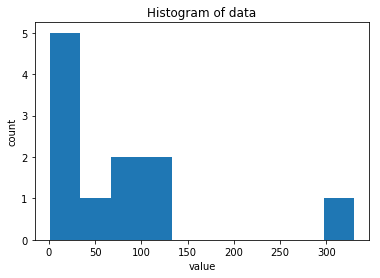

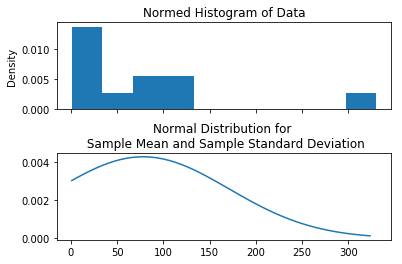

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.003043696118766221,
  0.0032199655617021193,
  0.0033893876006978905,
  0.0035498607637780458,
  0.0036993163754295505,
  0.003835762455746628,
  0.003957327620104853,
  0.004062303637007446,
  0.004149185296664217,
  0.004216706292300642,
  0.004263869919759713,
  0.00428997355551354,
  0.004294626072952526,
  0.004277757593578999,
  0.004239621233321831,
  0.004180786782975525,
  0.004102126543289009,
  0.004004793806873413,
  0.00

In [13]:
# instantiate class
G1 = Gaussian()
G1.read_data_file("../data/numbers.txt", sample=True)
G1.plot_histogram()
G1.plot_histogram_pdf()

## Magic Methods

#### Adding Gaussian Moments

X and Y being two gaussian samples. How can we add their moments together?

Mean:
$$
\mu_X + \mu_Y = \mu_{XY}
$$

Sigma:
$$
\sigma_X + \sigma_Y = \sqrt{\sigma_X^2 + \sigma_Y^2}
$$

This is the mathematical expression. What about adding them in your code? How can two objects of the `Gaussian` class be added together?

**Solution:** Using Magic Methods

> Magic Methods let you override and customize default python behavior.

For example, the `__init__` method lets you customize how Python instantiates an object. 

#### __add__, __repr__

Both methods are called magic methods, 

- `__add__`: method overrides the behavior of the plus sign. 

How does it work?

Example: `__add__`

```python
# ...we are in a class...

# define method together with self and other
# self: left of the plus sign
# other: right of the plus sign
    def __add__(self, other):

        # instantiate new Gaussian object
        result = Gaussian() 

        # new mean
        result.mean = self.mean + other.mean

        # new stdev
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)

        return result
```

- `__repr__` or representation method: Controls what gets printed out
 
Example: `__repr__`

```python
    def __repr__(self):
        
        return "mean {}, standard deviation {}".format(self.mean, self.stdev)
```

## Exercise: Code Magic Methods

- Building up on previous `Gaussian` class
- Two methods have been added: `__add__` and `__repr__`

In [17]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []
    
    def calculate_mean(self):
        """Method to calculate the mean of the data set.
        Args: 
            None
        Returns: 
            float: mean of the data set
        """
        
        #TODO: Calculate the mean of the data set. Remember that the data set is stored in self.data
        # Change the value of the mean attribute to be the mean of the data set
        # Return the mean of the data set           
        avg = 1.0 * sum(self.data) / len(self.data)
        self.mean = avg
        
        return self.mean         

    
    def calculate_stdev(self, sample=True):
        """Method to calculate the standard deviation of the data set.
        Args: 
            sample (bool): whether the data represents a sample or population
        Returns: 
            float: standard deviation of the data set
        """
        # TODO:
        #   Calculate the standard deviation of the data set
        #   
        #   The sample variable determines if the data set contains a sample or a population
        #   If sample = True, this means the data is a sample. 
        #   Keep the value of sample in mind for calculating the standard deviation
        #
        #   Make sure to update self.stdev and return the standard deviation as well    
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
        mean = self.mean
        
        sigma = 0
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
        self.stdev = sigma
        
        return self.stdev
        

    def read_data_file(self, file_name, sample=True):
        """Method to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
        Args:
            file_name (string): name of a file to read from
        Returns:
            None
        """
        # This code opens a data file and appends the data to a list called data_list
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        # TODO: 
        #   Update the self.data attribute with the data_list
        #   Update self.mean with the mean of the data_list. 
        #       You can use the calculate_mean() method with self.calculate_mean()
        #   Update self.stdev with the standard deviation of the data_list. Use the 
        #       calcaulte_stdev() method.
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)
        
    def plot_histogram(self):
        """Method to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        Args:
            Non
        Returns:
            None
        """
        # TODO: Plot a histogram of the data_list using the matplotlib package.
        #       Be sure to label the x and y axes and also give the chart a title
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
                
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        Args:
            x (float): point for calculating the probability density function
        Returns:
            float: probability density function output
        """
        
        # TODO: Calculate the probability density function of the Gaussian distribution
        #       at the value x. You'll need to use self.stdev and self.mean to do the calculation
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)     

    
    def plot_histogram_pdf(self, n_spaces = 50):
        """Method to plot the normalized histogram of the data and a plot of the 
        probability density function along the same range
        Args:
            n_spaces (int): number of data points 
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
        """

        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
         # calculates the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calculate the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

        # make the plots
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y

    def __add__(self, other):
        """Magic method to add together two Gaussian distributions
        Args:
            other (Gaussian): Gaussian instance
        Returns:
            Gaussian: Gaussian distribution
            
        """
        
        # TODO: Calculate the results of summing two Gaussian distributions
        #   When summing two Gaussian distributions, the mean value is the sum
        #       of the means of each Gaussian.
        #
        #   When summing two Gaussian distributions, the standard deviation is the
        #       square root of the sum of square ie sqrt(stdev_one ^ 2 + stdev_two ^ 2)
        
        # create a new Gaussian object
        result = Gaussian()
        
        # TODO: calculate the mean and standard deviation of the sum of two Gaussians
        result.mean = self.mean + other.mean # change this line to calculate the mean of the sum of two Gaussian distributions
        result.stdev = math.sqrt(self.stdev**2 + other.stdev**2) # change this line to calculate the standard deviation of the sum of two Gaussian distributions
        
        return result

    def __repr__(self):
        """Magic method to output the characteristics of the Gaussian instance
        Args:
            None
        Returns:
            string: characteristics of the Gaussian
        """
        
        # TODO: Return a string in the following format - 
        # "mean mean_value, standard deviation standard_deviation_value"
        # where mean_value is the mean of the Gaussian distribution
        # and standard_deviation_value is the standard deviation of
        # the Gaussian.
        # For example "mean 3.5, standard deviation 1.3"
        
        return("mean {}, standard deviation {}".format(self.mean, self.stdev))

## Inheritance

Previously we have coded a `Pants` and `Shirts` example separately. Note that both types had common attributes 

- color, size, style, price

as well as common methods like

- change_price(), discount_price()

We could have coded a parent "clothing" class to define those shared methods. 

Adding classes that inherits from this class is now easier and more efficient as common methods and attributes do not have to be coded again. 

Example:

```python
# Define parent class
class Clothing:
    def __init__(self, color, size, style, price):
        self.color = color
        self.size = size
        self.style = style
        self.price = price
    
    # def other methods
    # ...

# Define class that inherits from Clothing
# Inheritance by brackets: (Clothing)
class Shirt(Clothing):
    
    def __init__(self, color, size, style, price, long_or_short):
        
        # initializes attributes from Clothing
        Clothing.__init__(self, color, sized, style, price)
        
        # additional specific attributes
        self.long_or_short = long_or_short    
```

## Exercise: Inheritance with Clothing 

- `Clothing` class as "parent" is given, as well as two children classes: `Shirt` and `Pants`.
- Code a new class called Blouse.

In [15]:
class Clothing:

    def __init__(self, color, size, style, price):
        self.color = color
        self.size = size
        self.style = style
        self.price = price
        
    def change_price(self, price):
        self.price = price
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount)
    
    def calculate_shipping(self, weight, rate):
        return weight*rate       
        
class Shirt(Clothing):
    
    def __init__(self, color, size, style, price, long_or_short):
        
        Clothing.__init__(self, color, size, style, price)
        self.long_or_short = long_or_short
    
    def double_price(self):
        self.price = 2*self.price
    
class Pants(Clothing):

    def __init__(self, color, size, style, price, waist):
        
        Clothing.__init__(self, color, size, style, price)
        self.waist = waist
        
    def calculate_discount(self, discount):
        return self.price * (1 - discount / 2)
    
# TODO: Write a class called Blouse, that inherits from the Clothing class
# and has the the following attributes and methods:
#   attributes: color, size, style, price, country_of_origin
#     where country_of_origin is a string that holds the name of a 
#     country
#
#   methods: triple_price, which has no inputs and returns three times
#     the price of the blouse
#
#
class Blouse(Clothing):
    def __init__(self, color, size, style, price, country_of_origin):
        
        Clothing.__init__(self, color, size, style, price)
        self.country_of_origin = country_of_origin

# TODO: Add a method to the clothing class called calculate_shipping.
#   The method has two inputs: weight and rate. Weight is a float
#   representing the weight of the article of clothing. Rate is a float
#   representing the shipping weight. The method returns weight * rate    

## Inheritance Gaussian Class

Folder `OOP - 06 - code inheritance_probability_distributions` contains a jupyter notebook that demonstrates how **inheritance** can be used.

- Parent class: `Distribution`
- Children class: `Gaussian`, and later the class `Binomial` is added.
- Some modifications to previous code has been made.

> Task: Look through the aforementioned file.

## Advanced OOP Topics

Topics thus far: 

- classes and objects
- attributes and methods
- magic methods
- inheritance

These are the building blocks for OOP and enough to start writing object-oriented software and finish this OOP lesseon.

However, these are only the fundamentals of object-orientede programming topics. 

A list of resources for advanced Python object-oriented programming topics:

- [class methods, instance methods, and static methods](https://realpython.com/instance-class-and-static-methods-demystified/) - different types of methods that can be accessed at the class or object level. 
- [class attributes vs instance attributes](https://www.python-course.eu/python3_class_and_instance_attributes.php) - define attributes at the class level or at the instance level
- [multiple inheritance, mixins](https://easyaspython.com/mixins-for-fun-and-profit-cb9962760556) - A class can inherit from multiple parent classes
- [Python decorators](https://realpython.com/primer-on-python-decorators/) - Decorators are a short-hand way for using functions inside other functions. 

## Next

From the next lesson on, Python scripts rather than a Jupyter Notebook is used. Topics in the next section include: 

- Organizing into Modules
- Making a Package
- Virtual environments
- Binomial class
- Scikit-learn Source Code
- Putting Code on PyPi

In [16]:
print("Done!")

Done!
